In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Pull in data from csv file on local drive

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
# code to regulate the size of plots for the rest of notebook
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=13)

### Visualize the continuous variables:
- Temperature
- Rainfall
- Flyers
- Price
- Sales

**Explore some of the outliers**

(array([ 24.,  90., 171.,  71.,   8.,   0.,   0.,   0.,   0.,   1.]),
 array([ 15.1 ,  34.79,  54.48,  74.17,  93.86, 113.55, 133.24, 152.93,
        172.62, 192.31, 212.  ]),
 <a list of 10 Patch objects>)

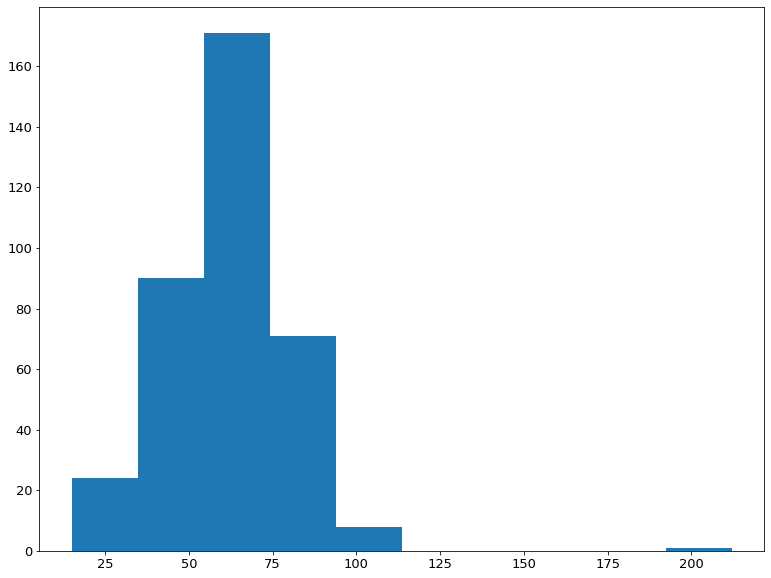

In [6]:
# histogram for temperatures
plt.hist(df.Temperature)

There's a day when it was 200 degrees? Look at that
Otherwise this looks fairly normally distributed

In [7]:
df.sort_values('Temperature', ascending = False)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
181,7/1/17,Saturday,102.9,0.47,59,0.5,43
176,6/26/17,Monday,102.6,0.47,60,0.5,42
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
...,...,...,...,...,...,...,...
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


(array([ 63., 167.,  70.,  27.,  26.,   7.,   3.,   1.,   0.,   1.]),
 array([0.4 , 0.61, 0.82, 1.03, 1.24, 1.45, 1.66, 1.87, 2.08, 2.29, 2.5 ]),
 <a list of 10 Patch objects>)

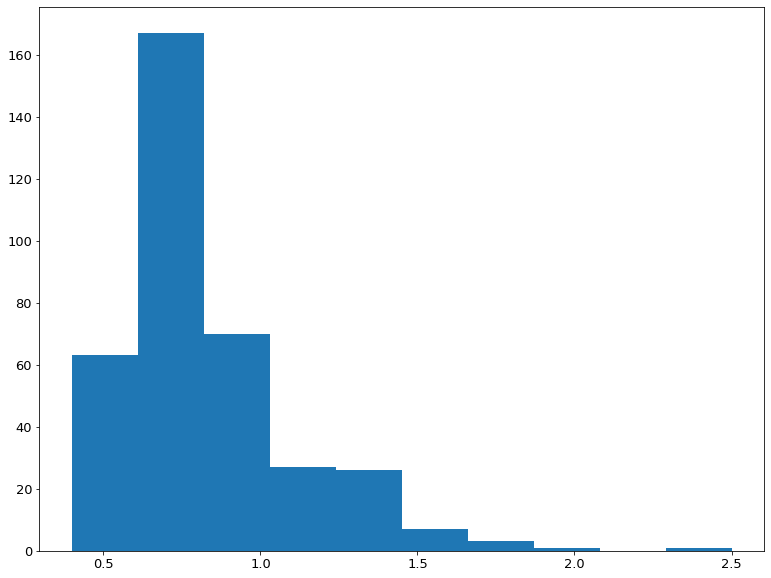

In [8]:
# histogram for rainfall
plt.hist(df.Rainfall)

This is pretty right skewed even if I decide to drop that data point out by 2.5 I don't think it can be considered normally distributed

At first glance I'd call that more of an anomaly than an outlier because although it's far away from our other data points, it's not unimaginable.

In [9]:
df.sort_values(by = 'Rainfall', ascending = False)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
15,1/16/17,Monday,30.6,1.67,24,0.5,12
...,...,...,...,...,...,...,...
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
166,6/16/17,Friday,99.3,0.47,77,0.5,41
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42


(array([  1.,   0.,   0.,   1.,  24.,  82., 119.,  99.,  31.,   8.]),
 array([-38. , -26.2, -14.4,  -2.6,   9.2,  21. ,  32.8,  44.6,  56.4,
         68.2,  80. ]),
 <a list of 10 Patch objects>)

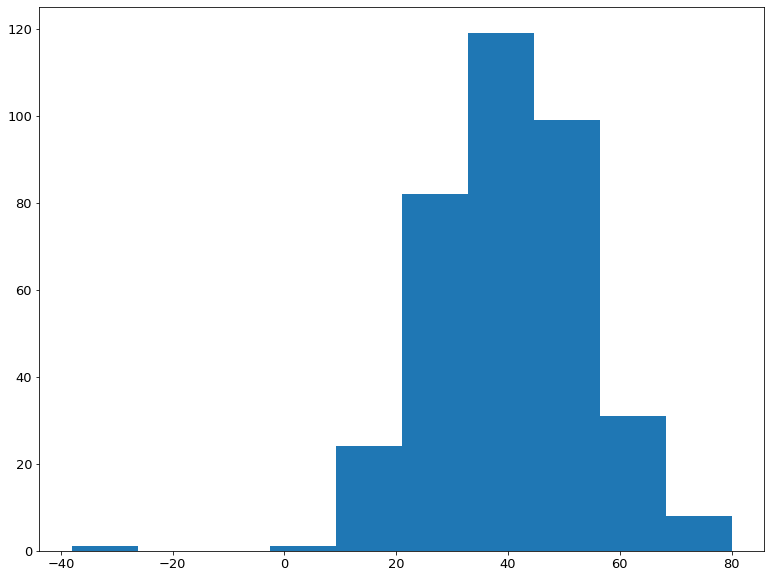

In [10]:
# histogram for flyers
plt.hist(df.Flyers)

Small amount of left skew, otherwise normally distributed 
There appears to be negative flyers which is not possible. More than likely will drop these as outliers

In [11]:
df.sort_values(by = 'Flyers', ascending = True)
# -38 flyers??

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
27,1/28/17,Saturday,34.9,1.33,15,0.5,13
...,...,...,...,...,...,...,...
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
166,6/16/17,Friday,99.3,0.47,77,0.5,41


In [12]:
df.Price.value_counts()

0.5    365
Name: Price, dtype: int64

(array([361.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  7. ,  59.7, 112.4, 165.1, 217.8, 270.5, 323.2, 375.9, 428.6,
        481.3, 534. ]),
 <a list of 10 Patch objects>)

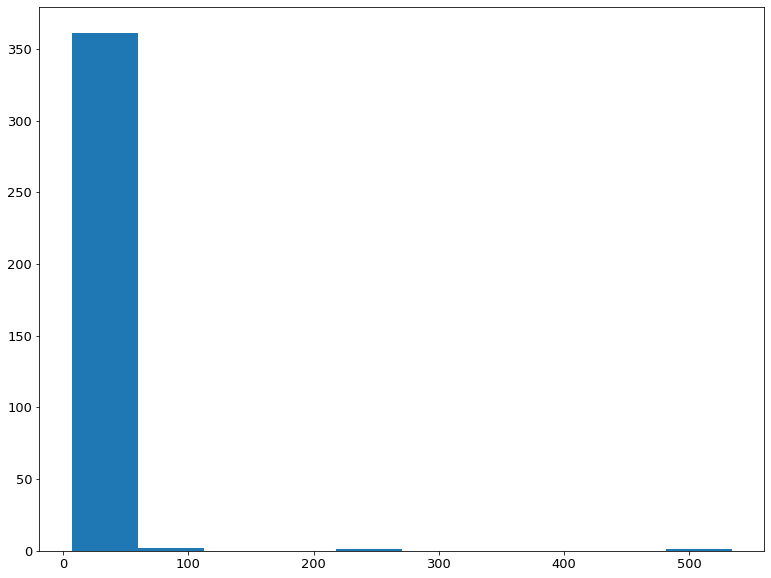

In [13]:
# histogram for sales
plt.hist(df.Sales)

How and when did the lemonade stand sell 500 cups of lenonade? Need to investigate further before I just drop this data point

In [14]:
# Look at that highest day for sales in context
df.sort_values(by = 'Sales', ascending = False)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
183,7/3/17,Monday,81.5,0.54,68,0.5,235
185,7/5/17,Wednesday,93.0,0.40,55,0.5,99
258,9/16/17,Saturday,68.1,0.69,37,0.5,87
181,7/1/17,Saturday,102.9,0.47,59,0.5,43
...,...,...,...,...,...,...,...
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
5,1/6/17,Friday,25.3,1.54,23,0.5,11
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


### 1. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5.
> -  **Do these lower outliers make sense?**
> - **Which outliers should be kept?**

In [15]:
# IQR for temperature
q1, q3 = df['Temperature'].quantile([.25, .75])
iqr = q1 - q3

In [16]:
#compute upper and lowe bounds
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr

### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [17]:
def get_lower_and_upper_bounds(pandas_series, multiplier):
    # get iqr
    q1, q3 = pandas_series.quantile([.25, .75])
    iqr = q3 - q1
    #compute upper and lower bounds
    
    ub = q3 + (multiplier * iqr)
    lb = q1 - (multiplier * iqr)
    return ub, lb

In [18]:
# Get the upper and lower bounds for the temperature column
pandas_series = df.Temperature
multiplier = 1.5
upper_bound, lower_bound = get_lower_and_upper_bounds(pandas_series, multiplier)

upper_bound, lower_bound

(104.7, 16.700000000000003)

Visualize the data again and determine if this makes sense

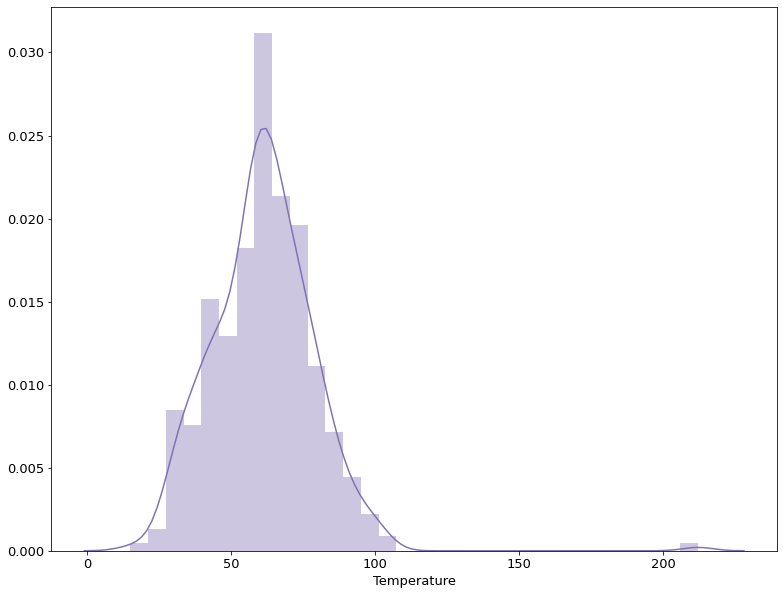

In [19]:
x=df.Temperature
sns.set_color_codes()
ax = sns.distplot(x, color="m")

Those look like good cut offs to me

In [20]:
# Get the upper and lower bounds for the Rainfall column
pandas_series = df.Rainfall
multiplier = 1.5
upper_bound, lower_bound = get_lower_and_upper_bounds(pandas_series, multiplier)

upper_bound,lower_bound

(1.3, 0.26)

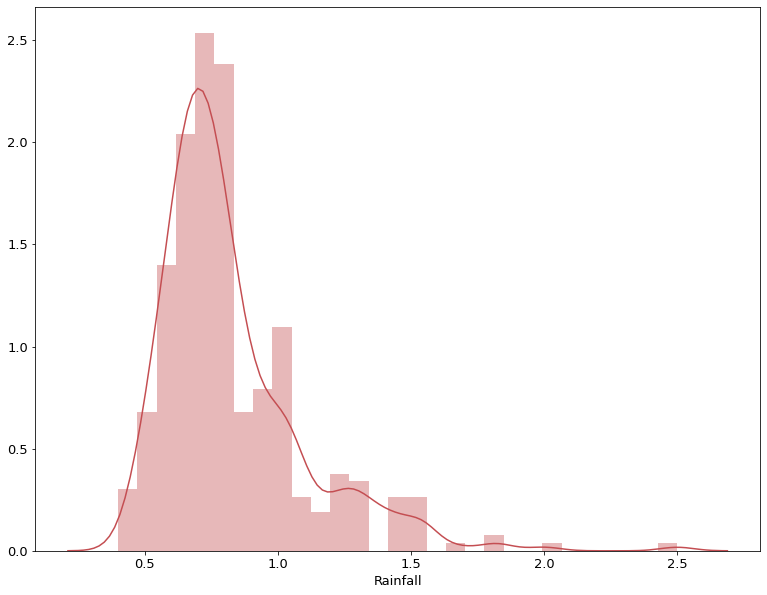

In [21]:
x=df.Rainfall
ax = sns.distplot(x, color="r")

Here the upper bound looks to me like it would cut out too much data

In [22]:
# Get the upper and lower bounds for the Flyers column
pandas_series = df.Flyers
multiplier = 1.5
upper_bound, lower_bound = get_lower_and_upper_bounds(pandas_series, multiplier)

upper_bound,lower_bound

(76.0, 4.0)

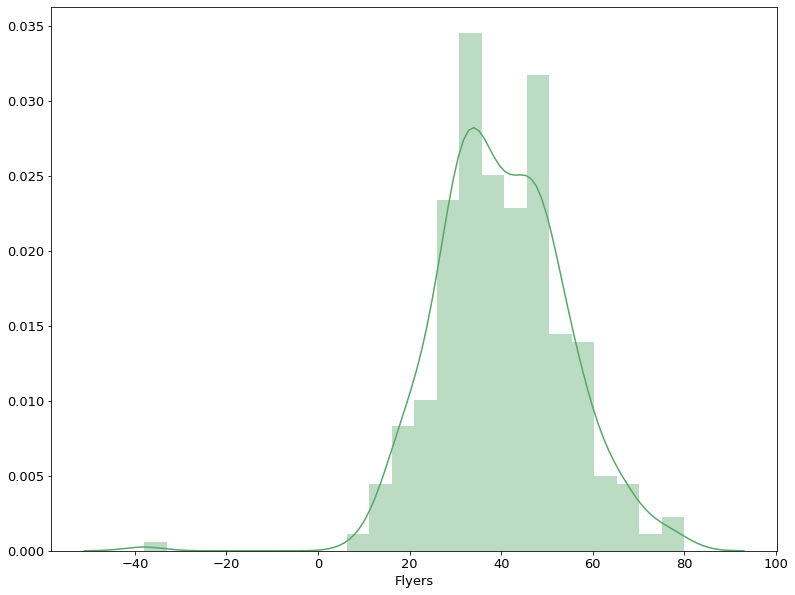

In [23]:
x=df.Flyers
ax = sns.distplot(x, color="g")

Lower bound does a good job of getting rid of the -40 outliers, Upper bound doesn't get rid of too many data points. Looks good to me

In [24]:
# Get the upper and lower bounds for the Sales column
pandas_series = df.Sales
multiplier = 1.5
upper_bound, lower_bound = get_lower_and_upper_bounds(pandas_series, multiplier)

upper_bound,lower_bound

(45.0, 5.0)

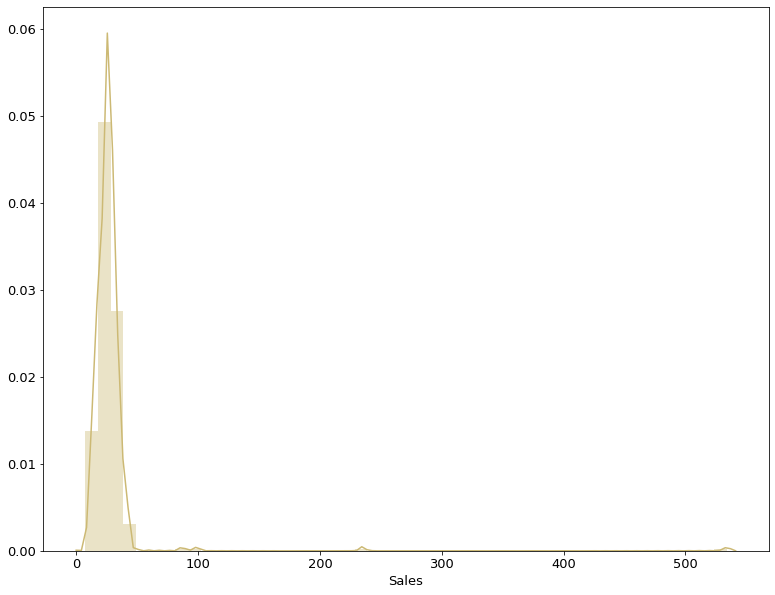

In [25]:
x=df.Sales
ax = sns.distplot(x, color="y")

Upper bound gets rid of too many points that may be worth looking into

### 3. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv.
> - **Do these lower outliers make sense?**
> - **Which outliers should be kept?**

In [26]:
# Get the upper and lower bounds for the Temperature column with multiplier set to 3
pandas_series = df.Temperature
multiplier = 3.0
upper_bound, lower_bound = get_lower_and_upper_bounds(pandas_series, multiplier)

upper_bound,lower_bound

(137.7, -16.299999999999997)

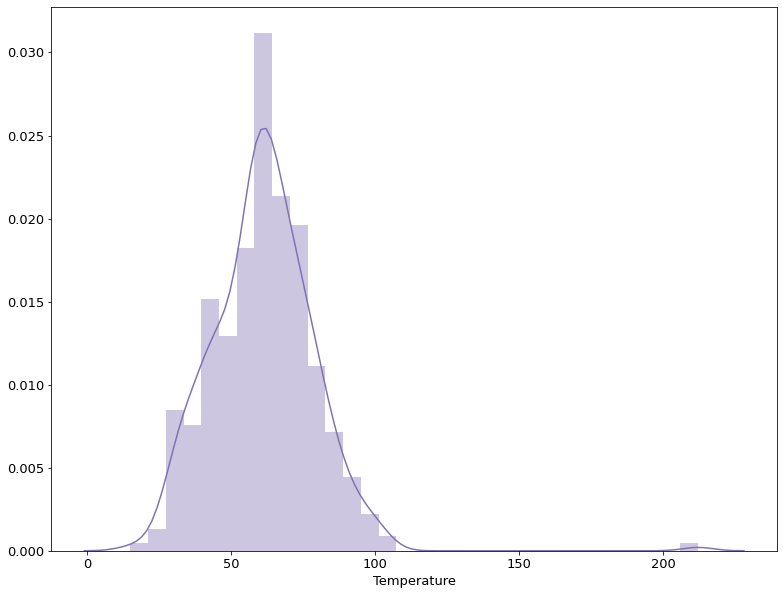

In [27]:
x=df.Temperature
sns.set_color_codes()
ax = sns.distplot(x, color="m")

Not reasonable boundaries, would not use multiplier of 3 on this series

In [28]:
# Get the upper and lower bounds for the Rainfall column with multiplier set to 3
pandas_series = df.Rainfall
multiplier = 3.0
upper_bound, lower_bound = get_lower_and_upper_bounds(pandas_series, multiplier)

upper_bound,lower_bound

(1.69, -0.13)

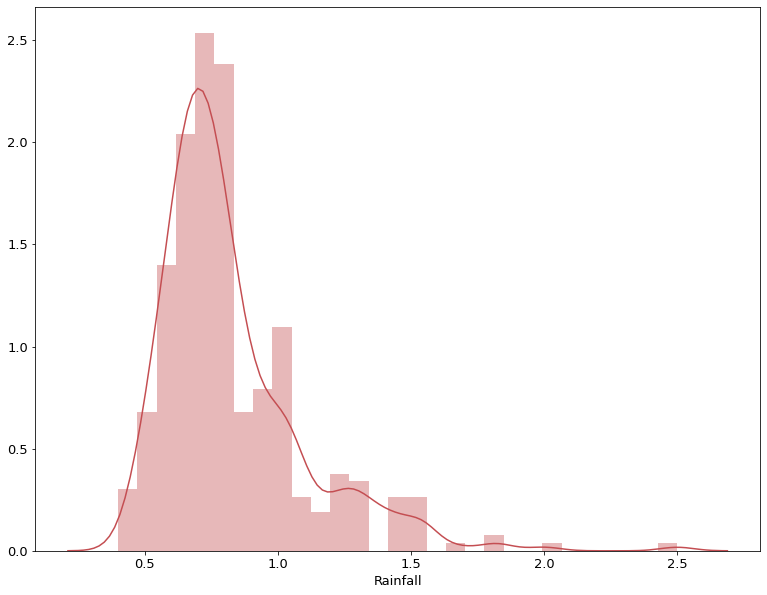

In [29]:
x=df.Rainfall
ax = sns.distplot(x, color="r")

I like this upper bound much more, the negative lower bound shouldn't affect any analysis moving forward

103.0 -23.0


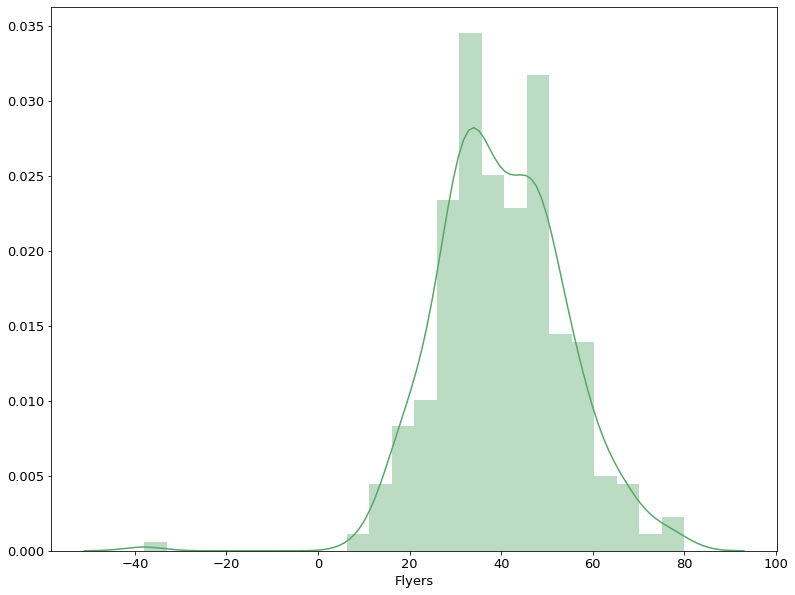

In [30]:
# Get the upper and lower bounds for the Flyers column with multiplier set to 3
pandas_series = df.Flyers
multiplier = 3.0
upper_bound, lower_bound = get_lower_and_upper_bounds(pandas_series, multiplier)

print (upper_bound,lower_bound)

x=df.Flyers
ax = sns.distplot(x, color="g")

This one works too for the -38 flyers. Keeps all the data points that are relevant. Would choose the multiplier of 3 for this series

-10.0 60.0


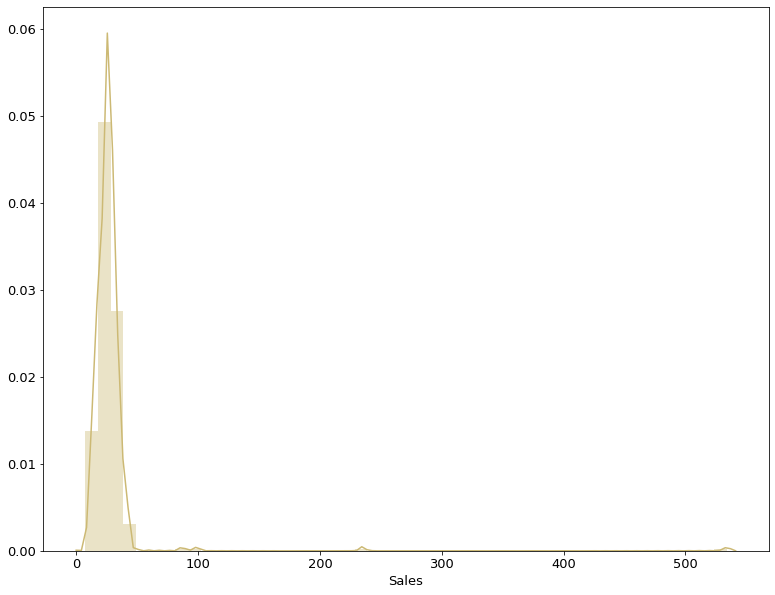

In [31]:
# Get the upper and lower bounds for the Sales column with multiplier set to 3
pandas_series = df.Sales
multiplier = 3.0
upper_bound, lower_bound = get_lower_and_upper_bounds(pandas_series, multiplier)

print (lower_bound, upper_bound)

x=df.Sales
ax = sns.distplot(x, color="y")

This one includes more sale data. I still might prefer to keep these in here

### Let's try to smooth out that function a bit

In [32]:
cols = df.columns.to_list()
cols = cols[2:] 

multiplier = 1.5

def get_lower_and_upper_bounds_(df, multiplier):
    # get iqr
    q1, q3 = cols.quantile([.25, .75])
    iqr = q3 - q1
    
    #compute upper and lower bounds
     
    ub = q3 + (multiplier * iqr)
    lb = q1 - (multiplier * iqr)
    return lb, ub

In [33]:
df.apply(get_lower_and_upper_bounds_(multiplier=1.5), axis = 0)

TypeError: get_lower_and_upper_bounds_() missing 1 required positional argument: 'df'

In [ ]:
# col_out = ["bathroomcnt", "bedroomcnt", "tax_rate", "calculatedfinishedsquarefeet", "lotsizesquarefeet", "structuretaxvaluedollarcnt", "taxvaluedollarcnt", "landtaxvaluedollarcnt"]

# def remove_outliers_iqr(df, col_out):
#     for col in enumerate(col_out):
#         col = str(col[1])
        
#         q1, q3 = df[col].quantile([.25, .75])
#         iqr = q3 - q1
#         ub = q3 + 3 * iqr
#         lb = q1 - 3 * iqr

#         df = df[df[col] <= ub]
#         df = df[df[col] >= lb]
#     return df